# **Cleaning Cafe Sales Dataset**

## **Loading in dataset**

In [2]:
import pandas as pd
df = pd.read_csv(r"/Users/marlen/Data_Analysis/Data_Cleaning/dirty_cafe_sales.csv")
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


## **Checking for Duplicates**

In [3]:
duplicates = df.duplicated()
df[duplicates]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


## **Handling Missing And Incorrectly Labeled Entries**

### **Checking all columns for null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

### **Replacing all 'Unknown' and 'Error' Entries with NaN**

In [6]:
import numpy as np

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()
        df[column] = df[column].replace(['ERROR', 'UNKNOWN'], np.nan)

df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### **Converting Columns to their Appropriate Data Types**

In [7]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

### **Filling Item Column Based on Respective Prices**

In [8]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', nan, 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [9]:
item_cost = {'Coffee': 2.0, 
             'Cake': 3.0, 
             'Cookie': 1.0, 
             'Salad': 5.0, 
             'Smoothie': 4.0,
             'Sandwich': 4.0,
             'Juice': 3.0,
             'Tea': 1.5}

price_item = {2.0: 'Coffee', 
             3.0: 'Cake', 
             1.0: 'Cookie', 
             5.0: 'Salad', 
             4.0: 'Smoothie',
             4.0: 'Sandwich',
             3.0: 'Juice',
             1.5: 'Tea'}

In [10]:
df['Item'] = df['Item'].fillna(df['Price Per Unit'].map(price_item))
df.isnull().sum()

Transaction ID         0
Item                  54
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [11]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Item'].map(item_cost))
df.isnull().sum()

Transaction ID         0
Item                  54
Quantity             479
Price Per Unit        54
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### **Filling Price Per Unit Column**

In [12]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])
df.isnull().sum()

Transaction ID         0
Item                  54
Quantity             479
Price Per Unit         6
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

#### **Refilling Item Column**

In [13]:
df['Item'] = df['Item'].fillna(df['Price Per Unit'].map(price_item))
df.isnull().sum()

Transaction ID         0
Item                   6
Quantity             479
Price Per Unit         6
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### **Filling Quantity Column**

In [14]:
df['Quantity'] = df["Quantity"].fillna(df['Total Spent']/df['Price Per Unit'])
df.isnull().sum()

Transaction ID         0
Item                   6
Quantity              23
Price Per Unit         6
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

#### **Filling Total Spent Column**

In [15]:
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'])
df.isnull().sum()

Transaction ID         0
Item                   6
Quantity              23
Price Per Unit         6
Total Spent           23
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

### **Dropping Rows with Null Entry in Transaction Date**

In [16]:
df.dropna(subset='Transaction Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9534 non-null   object        
 2   Quantity          9517 non-null   float64       
 3   Price Per Unit    9534 non-null   float64       
 4   Total Spent       9517 non-null   float64       
 5   Payment Method    6525 non-null   object        
 6   Location          5761 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB


### **Filling Null Values in Categorical Columns with 'Unknown'**

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')

df.isnull().sum()

Transaction ID       0
Item                 0
Quantity            23
Price Per Unit       6
Total Spent         23
Payment Method       0
Location             0
Transaction Date     0
dtype: int64

### **Checking if Data is Skewed or Approximately Normal**

<Axes: xlabel='Price Per Unit'>

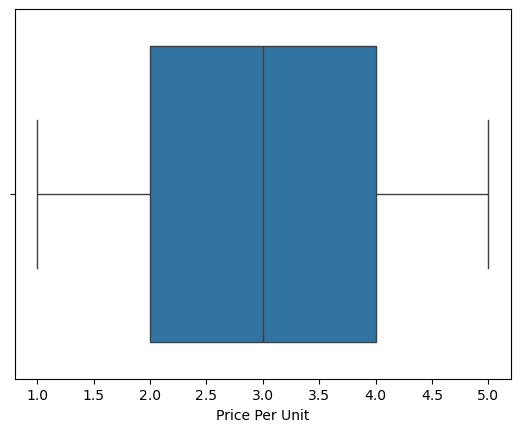

In [18]:
import seaborn as sns

sns.boxplot(x = df['Price Per Unit'])

<Axes: xlabel='Quantity'>

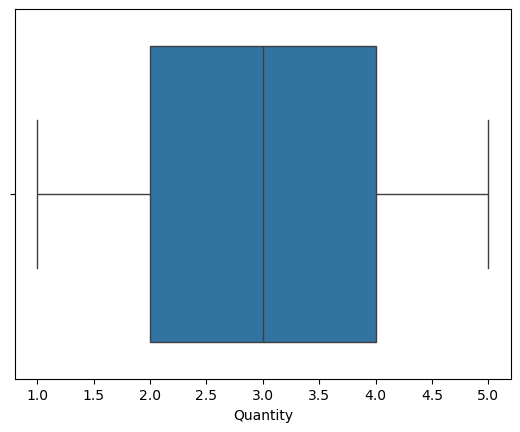

In [19]:
sns.boxplot(x = df['Quantity'])

<Axes: xlabel='Total Spent'>

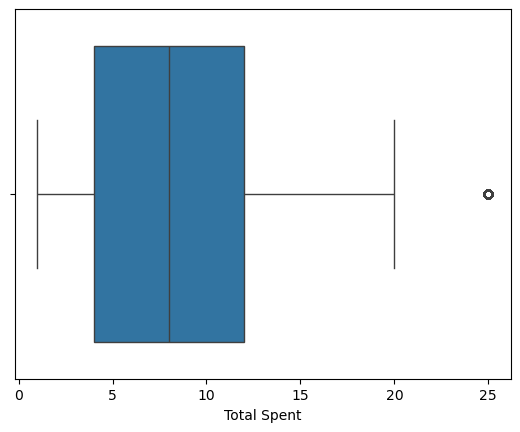

In [20]:
sns.boxplot(x = df['Total Spent'])

### **Filling Price Per Unit and Quantity Null Values with Average**

In [21]:
# Price Per Unit and Quantity are approximately normally distributed 
# so the average would be the best estimate

df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df.isnull().sum()

Transaction ID       0
Item                 0
Quantity             0
Price Per Unit       0
Total Spent         23
Payment Method       0
Location             0
Transaction Date     0
dtype: int64

### **Filling Total Spent Null Values with Median**

In [22]:
# Since the distribution of Total Spent is skewed right with an outlier, the
# median would be the best estimation

df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

## **Saving Cleaned Dataset**

In [23]:
df.to_csv('cleaned_cafe_sales.csv', index=False)